In [1]:
!pip install qiskit qiskit_aer matplotlib --upgrade

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
import numpy as np

def qft_rotations(qc, n):
    """Apply QFT rotations recursively on the first n qubits."""
    if n == 0:
        return qc
    n -= 1
    qc.h(n)
    for qubit in range(n):
        qc.cp(np.pi / 2**(n - qubit), qubit, n)
    qft_rotations(qc, n)
    return qc

def swap_registers(qc, n):
    """Swap qubits to reverse their order."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    return qc

def qft_circuit(n):
    """Builds an n-qubit Quantum Fourier Transform circuit."""
    qc = QuantumCircuit(n)
    qft_rotations(qc, n)
    swap_registers(qc, n)
    qc.name = "QFT"
    return qc

def run_qft(n):
    """Executes QFT circuit and displays Bloch sphere representation."""
    qc = qft_circuit(n)

    # Create a simulator and save the statevector explicitly
    simulator = AerSimulator(method='statevector')
    qc.save_statevector()

    # Transpile and run
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled).result()

    # Retrieve statevector safely
    statevector = result.data(0)["statevector"]

    # Display results
    plot_bloch_multivector(statevector)
    plt.show()
    print(qc.draw(output='text'))
# Task 1
if __name__ == "__main__":
    for n_qubits in [2,3,4]:
       print(f"Running Quantum Fourier Transform on {n_qubits} qubits...")
       run_qft(n_qubits)

Running Quantum Fourier Transform on 2 qubits...
                   ┌───┐    statevector 
q_0: ──────■───────┤ H ├─X───────░──────
     ┌───┐ │P(π/2) └───┘ │       ░      
q_1: ┤ H ├─■─────────────X───────░──────
     └───┘                       ░      
Running Quantum Fourier Transform on 3 qubits...
                                          ┌───┐    statevector 
q_0: ──────■──────────────────────■───────┤ H ├─X───────░──────
           │                ┌───┐ │P(π/2) └───┘ │       ░      
q_1: ──────┼────────■───────┤ H ├─■─────────────┼───────░──────
     ┌───┐ │P(π/4)  │P(π/2) └───┘               │       ░      
q_2: ┤ H ├─■────────■───────────────────────────X───────░──────
     └───┘                                              ░      
Running Quantum Fourier Transform on 4 qubits...
                                                                          ┌───┐»
q_0: ──────■───────────────────────────────■──────────────────────■───────┤ H ├»
           │                          

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
import numpy as np

def qft_rotations(qc, n):
    """Apply QFT rotations recursively on the first n qubits."""
    if n == 0:
        return qc
    n -= 1
    qc.h(n)
    for qubit in range(n):
        qc.cp(np.pi / 2**(n - qubit), qubit, n)
    qft_rotations(qc, n)
    return qc

def swap_registers(qc, n):
    """Swap qubits to reverse their order."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    return qc

def qft_circuit(n):
    """Builds an n-qubit Quantum Fourier Transform circuit."""
    qc = QuantumCircuit(n)
    qft_rotations(qc, n)
    swap_registers(qc, n)
    return qc

# Task 2
def inverse_qft_rotations(qc, n):
    if n == 0:
        return qc
    n -= 1
    for qubit in reversed(range(n)):
        qc.cp(-np.pi / 2**(n - qubit), qubit, n)
        qc.h(n)
    inverse_qft_rotations(qc, n)
    return qc

def inverse_qft_circuit(n):
    qc = QuantumCircuit(n)
    inverse_qft_rotations(qc, n)
    swap_registers(qc, n)
    return qc

def run_qft_and_inverse(n):
    qc = qft_circuit(n)
    simulator = AerSimulator(method='statevector')
    qc.save_statevector()
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled).result()
    statevector = result.data(0)["statevector"]
    print(qc.draw(output='text'))
    print(statevector)

    iqc = inverse_qft_circuit(n)
    iqc.save_statevector()
    compiled_i = transpile(iqc, simulator)
    result_i = simulator.run(compiled_i).result()
    statevector_i = result_i.data(0)["statevector"]
    print(qc.draw(output='text'))
    print(statevector_i)


if __name__ == "__main__":
    n_qubits = 3
    run_qft_and_inverse(n_qubits)


                                          ┌───┐    statevector 
q_0: ──────■──────────────────────■───────┤ H ├─X───────░──────
           │                ┌───┐ │P(π/2) └───┘ │       ░      
q_1: ──────┼────────■───────┤ H ├─■─────────────┼───────░──────
     ┌───┐ │P(π/4)  │P(π/2) └───┘               │       ░      
q_2: ┤ H ├─■────────■───────────────────────────X───────░──────
     └───┘                                              ░      
Statevector([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j],
            dims=(2, 2, 2))
                                          ┌───┐    statevector 
q_0: ──────■──────────────────────■───────┤ H ├─X───────░──────
           │                ┌───┐ │P(π/2) └───┘ │       ░      
q_1: ──────┼────────■───────┤ H ├─■─────────────┼───────░──────
     ┌───┐ │P(π/4)  │P(π/2) └───┘               │       ░      
q_2: ┤ H ├─■────────■───────────────

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
import numpy as np

def qft_rotations(qc, n):
    """Apply QFT rotations recursively on the first n qubits."""
    if n == 0:
        return qc
    n -= 1
    qc.h(n)
    for qubit in range(n):
        qc.cp(np.pi / 2**(n - qubit), qubit, n)
    qft_rotations(qc, n)
    return qc

def swap_registers(qc, n):
    """Swap qubits to reverse their order."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    return qc

def qft_circuit(n):
    """Builds an n-qubit Quantum Fourier Transform circuit."""
    qc = QuantumCircuit(n)
    qft_rotations(qc, n)
    swap_registers(qc, n)
    qc.name = "QFT"
    return qc

def run_qft(n):
    """Executes QFT circuit and displays Bloch sphere representation."""
    qc = qft_circuit(n)

    # Create a simulator and save the statevector explicitly
    simulator = AerSimulator(method='statevector')
    qc.save_statevector()

    # Transpile and run
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled).result()

    # Retrieve statevector safely
    statevector = result.data(0)["statevector"]

    # Display results
    plot_bloch_multivector(statevector)
    plt.show()
    print(qc.draw(output='text'))

# Task 3
def phase_esti():
  phase=0.125
  t=3
  n=1
  qc=QuantumCircuit(t+n,t)
  qc.h(range(t))
  qc.x(t)
  for k in range(t):
    exponent=2**k
    qc.cp(2*np.pi*phase*exponent,t-k-1,t)
    qc.append(qft_circuit(t).inverse(),range(t))
    qc.measure(range(t),range(t))
    print(qc.draw(output='text'))
    simulator=AerSimulator()
    compiled=transpile(qc,simulator)
    result=simulator.run(compiled,shots=1024).result()
    counts=result.get_counts()
    print(counts)
    return qc

if __name__ == "__main__":
       n_qubits = 3
       print(f"Running Quantum Fourier Transform on {n_qubits} qubits...")
       run_qft(n_qubits)
       print(f"Running Phase estimation")
       phase_esti()

Running Quantum Fourier Transform on 3 qubits...
                                          ┌───┐    statevector 
q_0: ──────■──────────────────────■───────┤ H ├─X───────░──────
           │                ┌───┐ │P(π/2) └───┘ │       ░      
q_1: ──────┼────────■───────┤ H ├─■─────────────┼───────░──────
     ┌───┐ │P(π/4)  │P(π/2) └───┘               │       ░      
q_2: ┤ H ├─■────────■───────────────────────────X───────░──────
     └───┘                                              ░      
Running Phase estimation
     ┌───┐         ┌─────────┐┌─┐      
q_0: ┤ H ├─────────┤0        ├┤M├──────
     ├───┤         │         │└╥┘┌─┐   
q_1: ┤ H ├─────────┤1 QFT_dg ├─╫─┤M├───
     ├───┤         │         │ ║ └╥┘┌─┐
q_2: ┤ H ├─■───────┤2        ├─╫──╫─┤M├
     ├───┤ │P(π/4) └─────────┘ ║  ║ └╥┘
q_3: ┤ X ├─■───────────────────╫──╫──╫─
     └───┘                     ║  ║  ║ 
c: 3/══════════════════════════╩══╩══╩═
                               0  1  2 
{'101': 11, '001': 55, '011': 19, '111

Running Quantum Fourier Transform on 3 qubits...
                                          ┌───┐    statevector 
q_0: ──────■──────────────────────■───────┤ H ├─X───────░──────
           │                ┌───┐ │P(π/2) └───┘ │       ░      
q_1: ──────┼────────■───────┤ H ├─■─────────────┼───────░──────
     ┌───┐ │P(π/4)  │P(π/2) └───┘               │       ░      
q_2: ┤ H ├─■────────■───────────────────────────X───────░──────
     └───┘                                              ░      
Running QFT Measurment
                                             ┌───┐    ░ ┌─┐      
   q_0: ──────■──────────────────────■───────┤ H ├─X──░─┤M├──────
              │                ┌───┐ │P(π/2) └───┘ │  ░ └╥┘┌─┐   
   q_1: ──────┼────────■───────┤ H ├─■─────────────┼──░──╫─┤M├───
        ┌───┐ │P(π/4)  │P(π/2) └───┘               │  ░  ║ └╥┘┌─┐
   q_2: ┤ H ├─■────────■───────────────────────────X──░──╫──╫─┤M├
        └───┘                                         ░  ║  ║ └╥┘
meas: 3/══════════

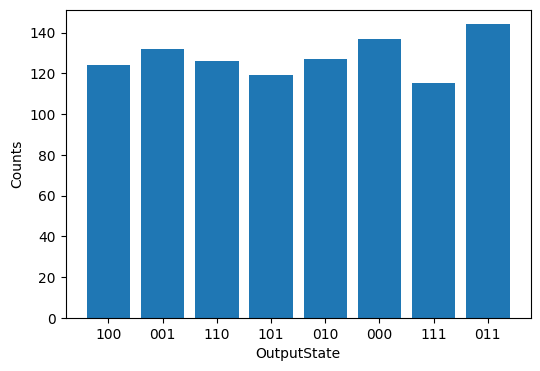

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
import numpy as np

def qft_rotations(qc, n):
    """Apply QFT rotations recursively on the first n qubits."""
    if n == 0:
        return qc
    n -= 1
    qc.h(n)
    for qubit in range(n):
        qc.cp(np.pi / 2**(n - qubit), qubit, n)
    qft_rotations(qc, n)
    return qc

def swap_registers(qc, n):
    """Swap qubits to reverse their order."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    return qc

def qft_circuit(n):
    """Builds an n-qubit Quantum Fourier Transform circuit."""
    qc = QuantumCircuit(n)
    qft_rotations(qc, n)
    swap_registers(qc, n)
    qc.name = "QFT"
    return qc

def run_qft(n):
    """Executes QFT circuit and displays Bloch sphere representation."""
    qc = qft_circuit(n)

    # Create a simulator and save the statevector explicitly
    simulator = AerSimulator(method='statevector')
    qc.save_statevector()

    # Transpile and run
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled).result()

    # Retrieve statevector safely
    statevector = result.data(0)["statevector"]

    # Display results
    plot_bloch_multivector(statevector)
    plt.show()
    print(qc.draw(output='text'))

# Task 4
def measure_qft(n,shots=1024):
    qc=qft_circuit(n)
    qc.measure_all()
    print(qc.draw(output='text'))
    simulator=AerSimulator()
    compiled=transpile(qc,simulator)
    result=simulator.run(compiled,shots=shots).result()
    counts=result.get_counts()
    print(counts)

    plt.figure(figsize=(6,4))
    plt.bar(counts.keys(),counts.values())
    plt.xlabel("OutputState")
    plt.ylabel("Counts")
    plt.show()
    return counts

if __name__ == "__main__":
       n_qubits =3
       print(f"Running Quantum Fourier Transform on {n_qubits} qubits...")
       run_qft(n_qubits)
       print("Running QFT Measurment")
       measure_qft(n_qubits)

┌───┐   
q_0: ──────■──────────────────────■───────┤ H ├─X─
           │                ┌───┐ │P(π/2) └───┘ │ 
q_1: ──────┼────────■───────┤ H ├─■─────────────┼─
     ┌───┐ │P(π/4)  │P(π/2) └───┘               │ 
q_2: ┤ H ├─■────────■───────────────────────────X─
     └───┘

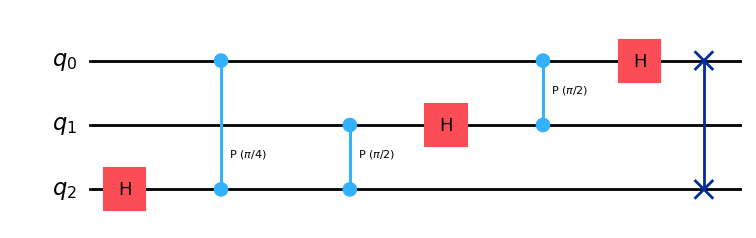

In [8]:
!pip install pylatexenc
!pip install qiskit_aer matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
import numpy as np

def qft_rotations(qc, n):
    """Apply QFT rotations recursively on the first n qubits."""
    if n == 0:
        return qc
    n -= 1
    qc.h(n)
    for qubit in range(n):
        qc.cp(np.pi / 2**(n - qubit), qubit, n)
    qft_rotations(qc, n)
    return qc

def swap_registers(qc, n):
    """Swap qubits to reverse their order."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    return qc

def qft_circuit(n):
    """Builds an n-qubit Quantum Fourier Transform circuit."""
    qc = QuantumCircuit(n)
    qft_rotations(qc, n)
    swap_registers(qc, n)
    qc.name = "QFT"
    return qc
# Task 5
def visualize_qft(n):
    qc = qft_circuit(n)
    display(qc.draw(output='text'))
    display(qc.draw(output='mpl'))
    plt.show()

if __name__ == "__main__":
       n_qubits = 3
       visualize_qft(n_qubits)